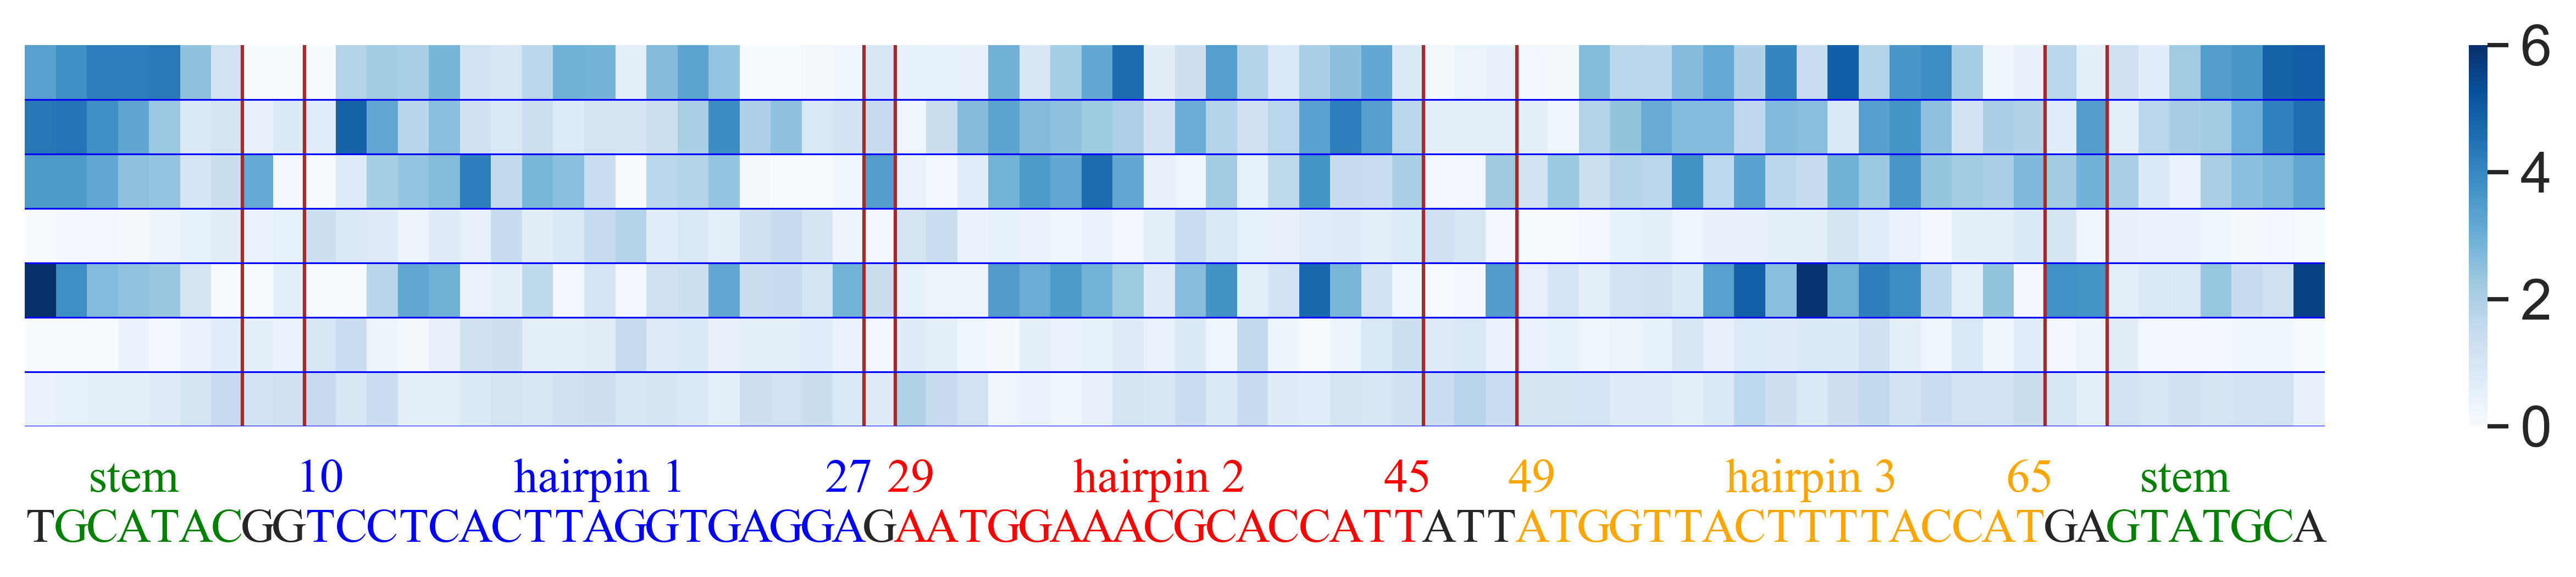

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
seq='TGCATACGGTCCTCACTTAGGTGAGGAGAATGGAAACGCACCATTATTATGGTTACTTTTACCATGAGTATGCA' 

seqlis = ["\n" + i for i in seq]

seqlis[3]="stem\nA"

seqlis[9]="10\nT"
seqlis[26]="27\nA"
seqlis[18]="hairpin 1\nA"

seqlis[26]="27\nA"
seqlis[28]="29\nA"
seqlis[36]="hairpin 2\nC"

seqlis[44]="45\nT"

seqlis[48]="49\nA"
seqlis[57]="hairpin 3\nT"

seqlis[64]="65\nT"

seqlis[69]="stem\nA"

file_xvg = ['0-f5a_f5a_beads_bas.xvg','0-hnp_hnp_beads_bas.xvg','0-f5a_f5amg_beads_bas.xvg','0-mg_f5amg_beads_bas.xvg',\
            '0-hnp_hnpmg_beads_bas.xvg','0-mg_hnpmg_beads_bas.xvg','0-mg_tdnaomg_beads_bas.xvg']

def getstr(path):
    with open(path,'r') as file:
        content = file.readlines()
        strength = []
        std = []
        for line in content:
            strength.append(eval(line.split()[1]))
            std.append(eval(line.split()[2]))
        return [strength,std]

all_str = []
all_std = []
for path in file_xvg:
    all_str.append(getstr(path)[0])
    all_std.append(getstr(path)[1])


y_ticks = ['','','','','','','']

x_ticks = seqlis

dp = 450

plt.figure(figsize=(15,3),dpi=dp)
sns.set(font_scale=1.5)
cmap = 'Blues'

ax = sns.heatmap(all_str, xticklabels=x_ticks, yticklabels=y_ticks,cmap=cmap,vmin=0,vmax=6)

plt.xticks(fontsize=14,fontfamily='Times New Roman',rotation=0)

for i in range(1,7):
    ax.get_xticklabels()[i].set_color("green")

for i in range(9,27):
    ax.get_xticklabels()[i].set_color("blue")

for i in range(28,45):
    ax.get_xticklabels()[i].set_color("red")

for i in range(48,65):
    ax.get_xticklabels()[i].set_color("orange")


for i in range(67,73):
    ax.get_xticklabels()[i].set_color("green")
plt.yticks(fontsize=14,fontfamily='Times New Roman')


c ='brown'

wid = 1

sns.lineplot(x=[7,7],y=[0,7],color=c,linewidth=wid,estimator=None)
sns.lineplot(x=[9,9],y=[0,7],color=c,linewidth=wid,estimator=None)

sns.lineplot(x=[27,27],y=[0,7],color=c,linewidth=wid,estimator=None)
sns.lineplot(x=[28,28],y=[0,7],color=c,linewidth=wid,estimator=None)

sns.lineplot(x=[45,45],y=[0,7],color=c,linewidth=wid,estimator=None)
sns.lineplot(x=[48,48],y=[0,7],color=c,linewidth=wid,estimator=None)

sns.lineplot(x=[65,65],y=[0,7],color=c,linewidth=wid,estimator=None)
sns.lineplot(x=[67,67],y=[0,7],color=c,linewidth=wid,estimator=None)


for i in range(9):
    sns.lineplot(x=[0,74],y=[i+1,i+1],color='blue',linewidth=0.5,estimator=None)

plt.savefig('DNAo_dpi450.tiff', dpi=dp,bbox_inches='tight')
plt.show()



In [11]:
from termcolor import colored
 
text = colored('这是下划线文本', attrs=['underline'])
print(text)

这是下划线文本


In [2]:
##计算与DNA整体结合的所以的beads的数量
num = [sum(tar) for tar in all_str]

print(num)


[144.73821892393326, 5.684919842062698, 154.32737738452028, 11.482279625136771, 142.8338280766852, 44.69582322439465, 2.325541125541126, 141.63871842443274, 40.90450977593835, 11.8595547309833, 75.3827886399315]


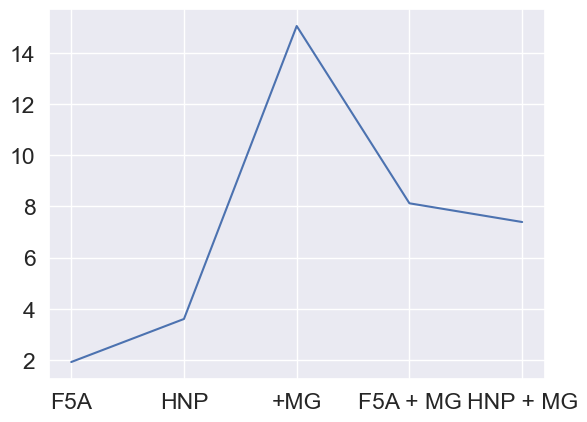

In [ ]:
# file_xvg = ['02-f5a_f5a_strength.xvg','02-ala_f5a_strength.xvg','02-hnp_hnp_strength.xvg','02-phe_hnp_strength.xvg','02-f5a_f5amg_strength.xvg','02-mg_f5amg_strength.xvg','02-ala_f5amg_strength.xvg',\
#             '02-hnp_hnpmg_strength.xvg','02-mg_hnpmg_strength.xvg','02-phe_hnpmg_strength.xvg','02-mg_tdnaomg_strength.xvg']


pathnopep = [['02-f5a_f5a_strength.xvg'],['02-hnp_hnp_strength.xvg'],['02-mg_tdnaomg_strength.xvg'],['02-f5a_f5amg_strength.xvg','02-mg_f5amg_strength.xvg'],\
             ['02-hnp_hnpmg_strength.xvg','02-mg_hnpmg_strength.xvg']]#,['01-mg_tdnadmg.xvg'],['01-ala_f5amg.xvg','01-mg_f5amg.xvg'],['01-phe_phemg.xvg','01-mg_phemg.xvg']]

def readfile(path):
    with open(path,'r') as file:
        content = file.readlines()
        lis = []
        for lin in content:
            if eval(lin.split()[1]) >=5:
                lis.append(eval(lin.split()[2]))
            else:
                lis.append(0)
        
    return [1-math.exp(-x) for x in lis]

allis = []
for patlis in pathnopep:
    onelis = []
    for pat in patlis:
        onelis.append(readfile(pat))
    allis.append(sum([sum(x) for x in onelis]))

x = ['F5A','HNP','+MG','F5A + MG','HNP + MG',]

plt.plot(x,allis)